### 데이터의 시각화
1. 사용하는 라이브러리 matplotlip
2. 라인 , 바, 산점도, 히스토그램 그래프 시각화
3. 그 외의 그래프가 여러 종류가 존재


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
plt.plot([1,2,3,4])
plt.xlabel("x")
plt.show()

- subplot()
    - 한 영역에 여러개의 그래프를 그려주기위한 함수
    - subplot(행의개수, 열의개수 ,위치)

In [ ]:
plt.subplot(1,2,1)
plt.plot([1,2,3,4])
plt.subplot(1,2,2)
plt.plot([4,3,2,1])
plt.show()

In [ ]:
fig, axes = plt.subplots(2,2)
axes[0][0].plot([1,2,3,4])
axes[0][1].plot([4,3,2,1])
axes[1][0].plot([1,2,2,1])
axes[1][1].plot([3,4,2,1])
plt.show()

- 그래프를 그릴 때 주의 할 점
    - y축의 값만 입력하는 경우 - 문제되는 경우가 거의 존재하지 않는다.
    - x축과 y축의 값을 같이 입력하는 경우
        - x의 값과 y의 값의 위치를 정확하게 대입
        - x의 개수와 y의 개수가 일치해야 한다.

In [ ]:
x = [1,2,3,4]
y = [4,3,2,1]
plt.plot(x,y)
plt.show()

In [ ]:
## x축의 이름, y축의 이름, 그래프의 이름
plt.plot([1,2,3,4])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("title")
plt.show()

In [ ]:
# 두 개의 그래프를 하나의 그래프에 그리기
plt.plot([1,2,3,4],label ="ascending")
plt.plot([4,3,2,1],label ="descending" )
plt.legend(loc= 'best')   #loc = 1,2,3,4, .. 
plt.show()


In [ ]:
## 한글이 깨지는 현상을 막기 위해 폰트 변경 
## 맑은 고딕체로 변경
plt.rc('font',family='Malgun Gothic')

In [ ]:
plt.plot([1,2,3,4])
plt.xlabel("x축")
plt.ylabel("y축")
plt.show()

In [ ]:
## Finance -Datareader
import FinanceDataReader as fdr
import pandas as pd

In [ ]:
kospi = fdr.DataReader("KS11",'2019')

In [ ]:
kospi.tail()

In [ ]:
# 그래프의 사이즈 조정 figsize=(x의 길이, y의 길이)
plt.figure(figsize = (14,6))
# grid 추가 
plt.grid(True,axis='y')
plt.plot(kospi["Close"].head(20),marker='o')
plt.xlabel("날짜")
plt.ylabel("종가")
plt.show()

- 바형 그래프
    - bar() 함수를 이용하여 그래프를 출력
    - bar(x축, y축) 
    - x값이 존재하지 않으면 에러 발생

In [ ]:
plt.bar([1,2,3,4],[4,3,2,1],color=['red','green','blue','yellow'])
plt.show()

In [ ]:
## 월별 평균으로 데이터를 재표집
mean_kospi_2020 = kospi.loc['2020'].resample('MS').mean()
mean_kospi_2020

In [ ]:
# x축은 'xxxx년xx월' 표시
x = mean_kospi_2020.index.strftime('%Y년%m월')
# y축은 '평균 거래량'
## bar() 그래프
plt.figure(figsize=(14,6))
# 지수 표현식을 일반 표현식으로 변경 y축의 단위
plt.ticklabel_format(axis='x', style='plain')
plt.barh(x,mean_kospi_2020["Volume"])
plt.xlabel("년-월")
plt.ylabel("평균 거래량")
plt.show()

- 히스토그램
    - 데이터의 개수를 표현하는 바 그래프    
    

In [ ]:
data = [1,2,2,3,3,3,4,4,4]
plt.hist(data, bins=11)
plt.show()

In [ ]:
## kospi에서 변동율 파생변수 생성
## 변동률 = (close - open) / open * 100
kospi["변동률"] = (kospi["Close"]-kospi["Open"])/kospi["Open"]*100
kospi.head()

In [ ]:
## 변동률을 histogram
plt.rc("axes",unicode_minus=False) #음수를 표시
plt.grid()
plt.hist(kospi["변동률"],bins=20)
plt.show()

In [ ]:
## candlestick
import mplfinance as mpf

In [ ]:
mpf.plot(data=kospi.loc['2020-12'],type='candle')


In [ ]:
marketcolor = mpf.make_marketcolors(
    up = 'r',
    down = 'b',
    edge = 'inherit',  ## 모서리의 색
    wick = 'inherit'  ## 꼬리 색
)

style = mpf.make_mpf_style(
    base_mpf_style = 'starsandstripes',
    marketcolors= marketcolor,
    gridaxis = 'both',
    y_on_right = True
)

mpf.plot(data = kospi.loc['2020-12'],type='candle',style=style)

In [ ]:
## csv 파일 로드
df = pd.read_csv("../test csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv",encoding='euc-kr')
df.head()

In [ ]:
## 지수표현 없이 값 출력
pd.options.display.float_format = '{:2f}'.format
df.head()

### 문제
1. 데이터를 확인하여서 굉장히 이상한 데이터가 존재 체크
2. 각 컬럼의 이름을 변경 ['기준년월','업종','성별','연령대','총이용건수','총이용금액']
3. 기준연월을 시계열로 변경
4. index를 기준연월로 변경 

In [ ]:
df.columns = ['기준년월','업종','성별','연령대','총이용건수','총이용금액']

In [ ]:
## to_datetime(df['기준년월'],format= "기준이 되는 데이터의 형식")
df['기준년월'] = pd.to_datetime(df['기준년월'],format='%Y%m')

In [ ]:
df = df.set_index(df['기준년월'])
df = df.iloc[:,1:]


In [ ]:
print((df[['총이용건수','총이용금액']] <0).sum())
df[(df[['총이용건수','총이용금액']] <0).any(1)]

In [ ]:
df['연령대'].value_counts()


### 연습문제
1. df_2에 성별 컬럼의 데이터 값을 1은 남자 2는 여자 변경
2. 연령대가 0인 값을 제외한 새로운 데이터프레임 생성 df_2
3. 남,녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력 & 시각화
4. 2,3,번의 과정을 df로 한번더 진행

In [ ]:
#case1 -for문을 이용해서 변경
# for i in range(len(df['성별'])):
#     if df["성별"][i] ==1:
#         df["성별"][i] ="남자"
#     else :
#         df["성별"][i] = "여자"

# case2 
df['성별'] = df['성별'].apply(lambda x: "남자" if(x==1) else "여자")


In [ ]:
df_2 = df[(df['연령대']!=0)]
df_2


In [ ]:
## 인덱스는 리스트형태이기 때문에 dt를 안하고 strdtime을 쓴다
df_2['연도'] = df_2.index.strftime("%Y")

In [ ]:
# 연령대 0을 제외한
pv = pd.pivot_table(df_2,values=["총이용건수","총이용금액"],index="연도",columns="성별",aggfunc='sum')
mean_df = pv["총이용금액"]
print(mean_df)
plt.rc('font',family='Malgun Gothic')
mean_df.plot.bar()


In [ ]:
df_online = pd.read_csv("../test csv/온라인+카드소비트렌드+데이터_1901_2109.csv",encoding="euc-kr")
df_online.head()

In [ ]:
df_online.columns = ['기준년월','성별','연령대','총이용건수','총이용금액']

In [ ]:
## 기준년월을 시계열 변경 - >인덱스로 변경
df_online["기준년월"] = pd.to_datetime(df_online["기준년월"],format="%Y%m")
df_online.set_index(df_online["기준년월"],inplace=True)
df_online = df_online.iloc[:,1:]

In [ ]:
df_ondf_online =df_online.iloc[:,1:]
df_ondf_online.head()

### 온라인 카드 매출과 오프라인 카드매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
2. 온라인 데이터 df.online도 월별로 그룹화 총 이용금액의 합계
    - 기준년월을 시계열데이터 변경
    - 기준년월 인덱스로 변경
    - 인덱스를 기준으로 그룹화 -> 총이용금액의 합계
3. 1,2번 과정에서 나온 데이터를 plot그래프를 그려서 차이를 확인

In [ ]:
df.head()

In [ ]:
## 인덱스를 기준으로 그룹화
group_df = df.groupby(df.index).sum()["총이용금액"]

In [ ]:
group_df_online = df_online.groupby(df_online.index).sum()["총이용금액"]

In [ ]:
plt.plot(group_df,label="오프라인",marker='o')
plt.plot(group_df_online,label="온라인",marker='x')
plt.ticklabel_format(axis="y",style="plain")
plt.title("오프라인/온라인 카드매출 비교" )
plt.legend()
plt.show()

### 2개의 데이터프레임을 결합
1. df_onlien에 업종 파생변수 생성 값은 "온라인"
2. df와 df_online데이터 프레임을 결합
3. 월별 ,업종별로 총 이용금액이 어떻게 되는가??

In [ ]:
df_online["업종"] ="온라인"
df_online.head()

In [ ]:
df_total = pd.concat([df,df_online],axis=0)
df_total.tail()

In [ ]:
group_total = pd.pivot_table(df_total,index=df_total.index,columns="업종",aggfunc="sum")["총이용금액"]
group_total

In [ ]:
group_total_1 =df_total.groupby([df_total.index,"업종"]).sum()["총이용금액"]
print(group_total_1)
group_total_1.index[0]

In [ ]:
group_total.plot()

In [ ]:
for col in group_total.columns:
    plt.plot(group_total[col],label = col)
plt.legend()
plt.show()

- df_total에서 온라인 업종의 남,녀의 카드매출이 월별로 어떻게 차이가 나는가??를 시각화 하여 출력

In [ ]:
df_total["성별"] = df_total["성별"].apply(lambda x: "남자" if (x==1) | (x=="남자") else "여자")

In [ ]:
online_total = df_total[df_total["업종"]=="온라인"]
online_total.head()

In [ ]:
sample = online_total.groupby("성별")["총이용금액"].sum()
sample

In [ ]:
plt.bar(sample.index,sample.values,color=["b","r"])
plt.title("성별 온라인 총사용금액")
plt.xlabel("성별")
plt.ylabel("총사용금액")
plt.show()

<AxesSubplot:xlabel='기준년월'>

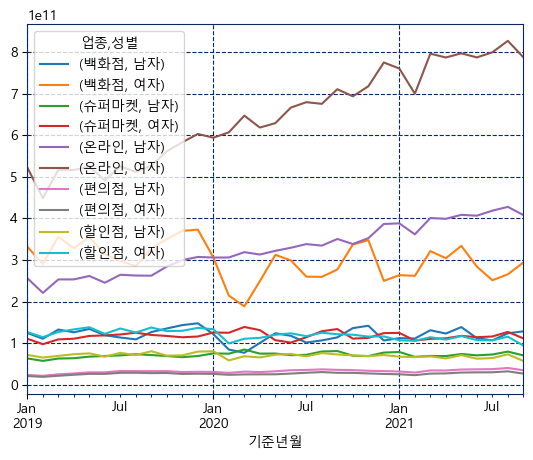

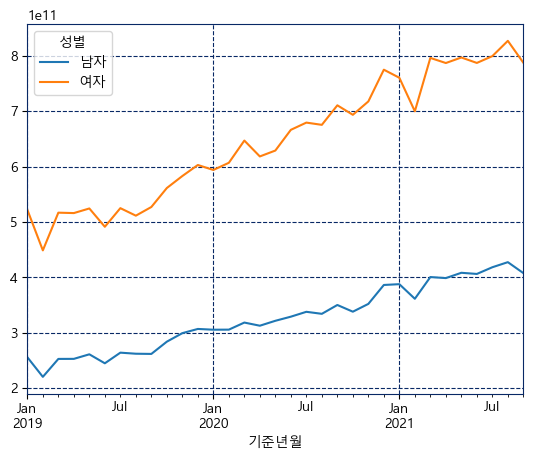

In [631]:
zz = pd.pivot_table(df_total,index=df_total.index,columns=["업종","성별"],values="총이용금액",aggfunc="sum")
zz.plot()

zz["온라인"].plot()

<AxesSubplot:xlabel='기준년월'>

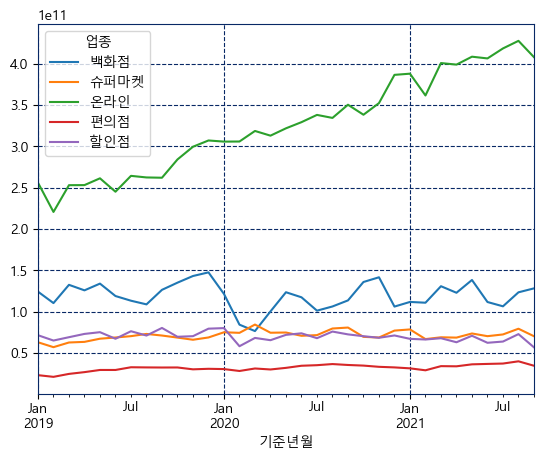

In [630]:
pp = pd.pivot_table(df_total,index=df_total.index,columns=["성별","업종"],values="총이용금액",aggfunc="sum")['남자']
pp.plot()